# Melanoma Statistics 

## Table Web Scraping

In [2]:
# Introducing the Necessary Imports and Scraping the Data 
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd

browser = Browser('chrome')

# URL of the webpage to scrape
url = "https://seer.cancer.gov/statfacts/html/melan.html"

# Visit the webpage
browser.visit(url)

# Get the HTML content of the page
html_content = browser.html

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table - inspect the HTML to find a unique identifier for the table
table = soup.find('table')  # Adjust this selector to match the table on the page

# Extract headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip header row
    cells = [cell.text.strip() for cell in row.find_all(['td', 'th'])]
    rows.append(cells)

# Handle potential mismatch in headers and row lengths
if len(headers) != len(rows[0]):
    print("Header and row column counts don't match. Adjusting...")
    # Use the minimum number of columns to avoid mismatches
    min_columns = min(len(headers), len(rows[0]))
    headers = headers[:min_columns]
    rows = [row[:min_columns] for row in rows]

# Create a DataFrame for easier viewing and manipulation
df = pd.DataFrame(rows, columns=headers)

# Print or save the DataFrame
print(df)

# Quit the browser
browser.quit()


Header and row column counts don't match. Adjusting...
        Year Rate of New Cases — SEER 8 Rate of New Cases — SEER 12  \
0   Observed              Modeled Trend                    Observed   
1       1975                       8.78                        8.57   
2       1976                       8.84                        9.00   
3       1977                       9.65                        9.46   
4       1978                       9.64                        9.94   
5       1979                      10.19                       10.44   
6       1980                      11.10                       10.97   
7       1981                      11.68                       11.53   
8       1982                      11.57                       11.85   
9       1983                      11.90                       12.18   
10      1984                      12.10                       12.52   
11      1985                      13.59                       12.87   
12      1986          

### Exploratory Data Analysis 

In [3]:
#Beginning Exploratory Data Analysis 
df.head()

,Year,Rate of New Cases — SEER 8,Rate of New Cases — SEER 12,Death Rate — U.S.,5-Year Relative Survival — SEER 8,Observed,Modeled Trend,Observed
0,Observed,Modeled Trend,Observed,Modeled Trend,Observed,Modeled Trend,Observed,Modeled Trend
1,1975,8.78,8.57,-,-,2.07,2.18,82.34%
2,1976,8.84,9.00,-,-,2.24,2.22,83.81%
3,1977,9.65,9.46,-,-,2.27,2.25,82.66%
4,1978,9.64,9.94,-,-,2.31,2.29,82.78%


In [4]:
# Exploratory Data Analysis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               49 non-null     object
 1   Rate of New Cases — SEER 8         49 non-null     object
 2   Rate of New Cases — SEER 12        49 non-null     object
 3   Death Rate — U.S.                  49 non-null     object
 4   5-Year Relative Survival — SEER 8  49 non-null     object
 5   Observed                           49 non-null     object
 6   Modeled Trend                      49 non-null     object
 7   Observed                           49 non-null     object
dtypes: object(8)
memory usage: 3.2+ KB


In [5]:
# Exploratory Data Analysis 
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Year', 'Rate of New Cases — SEER 8', 'Rate of New Cases — SEER 12',
       'Death Rate — U.S.', '5-Year Relative Survival — SEER 8', 'Observed',
       'Modeled Trend', 'Observed'],
      dtype='object')>

In [6]:
# Exploratory Data Analysis 
df.dtypes

Year                                 object
Rate of New Cases — SEER 8           object
Rate of New Cases — SEER 12          object
Death Rate — U.S.                    object
5-Year Relative Survival — SEER 8    object
Observed                             object
Modeled Trend                        object
Observed                             object
dtype: object

### Exporting Data Table 

In [7]:
#Export Data Frame into CSV 
df.to_csv('final_project_table.csv', index=False)

## Re-Read In Manipulated Data Table from Excel 

In [8]:
# Re-Read in Data Frame after Manually Deleting the First Row and Renaming the Columns 
final_df = pd.read_csv('Final Project Data Table(csv).csv', encoding='ISO-8859-1')
final_df.head()

,Year,Seer 8 Observed,Seer 8 Modeled Trend,Seer 12 Observed,Seer 12 Modeled Trend,Death Rate U.S. Observed,Death Rate U.S. Modeled Trend,5-Year Relative Survival  SEER 8 Observed,5-Year Relative Survival  SEER 8 Modeled
0,1975,8.78,8.57,-,-,2.07,2.18,82.34%,81.02%
1,1976,8.84,9,-,-,2.24,2.22,83.81%,81.67%
2,1977,9.65,9.46,-,-,2.27,2.25,82.66%,82.30%
3,1978,9.64,9.94,-,-,2.31,2.29,82.78%,82.91%
4,1979,10.19,10.44,-,-,2.42,2.33,83.46%,83.50%


### Exploratory Data Analysis with Corrected Data Frame

In [9]:
# Exploratory Data Analysis with New Data Frame 
final_df.dtypes

Year                                            int64
Seer 8 Observed                                object
 Seer 8 Modeled Trend                          object
 Seer 12 Observed                              object
Seer 12 Modeled Trend                          object
Death Rate U.S. Observed                      float64
Death Rate U.S. Modeled Trend                 float64
5-Year Relative Survival  SEER 8 Observed     object
5-Year Relative Survival  SEER 8 Modeled      object
dtype: object

In [10]:
# Exploratory Data Analysis with New Data Frame 
final_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Year ', 'Seer 8 Observed', ' Seer 8 Modeled Trend',
       ' Seer 12 Observed', 'Seer 12 Modeled Trend',
       'Death Rate U.S. Observed', 'Death Rate U.S. Modeled Trend',
       '5-Year Relative Survival  SEER 8 Observed',
       '5-Year Relative Survival  SEER 8 Modeled'],
      dtype='object')>

### Table Manipulation

In [11]:
# Replacing th "-" with "0" to be able to Change the Data Types 
final_df['Seer 8 Observed'] = final_df['Seer 8 Observed'].replace('-','0')
final_df[' Seer 8 Modeled Trend'] = final_df[' Seer 8 Modeled Trend'].replace('-','0')
final_df[' Seer 12 Observed'] = final_df[' Seer 12 Observed'].replace('-','0')
final_df['Seer 12 Modeled Trend'] = final_df['Seer 12 Modeled Trend'].replace('-','0')

In [12]:
final_df.head()

,Year,Seer 8 Observed,Seer 8 Modeled Trend,Seer 12 Observed,Seer 12 Modeled Trend,Death Rate U.S. Observed,Death Rate U.S. Modeled Trend,5-Year Relative Survival  SEER 8 Observed,5-Year Relative Survival  SEER 8 Modeled
0,1975,8.78,8.57,0,0,2.07,2.18,82.34%,81.02%
1,1976,8.84,9,0,0,2.24,2.22,83.81%,81.67%
2,1977,9.65,9.46,0,0,2.27,2.25,82.66%,82.30%
3,1978,9.64,9.94,0,0,2.31,2.29,82.78%,82.91%
4,1979,10.19,10.44,0,0,2.42,2.33,83.46%,83.50%


In [13]:
#Changing the Data Types 
final_df['Seer 8 Observed'] = final_df['Seer 8 Observed'].astype('float')
final_df[' Seer 8 Modeled Trend'] = final_df[' Seer 8 Modeled Trend'].astype('float')
final_df[' Seer 12 Observed'] = final_df[' Seer 12 Observed'].astype('float')
final_df['Seer 12 Modeled Trend'] = final_df['Seer 12 Modeled Trend'].astype('float')

In [14]:
#ReNaming the Columns Prperly 
final_df.columns = ['Year', 'Seer 8 Observed', 'Seer 8 Modeled Trend', 'Seer 12 Observed', 'Seer 12 Modeled Trend', 'Death Rate US Observed', 'Death Rate US Modeled Trend', '5 Year Relative Survival SEER 8 Observed', '5 Year Relative Survival SEER 8 Modeled']

In [15]:
# Checking if the Columns are Properly Named
final_df

,Year,Seer 8 Observed,Seer 8 Modeled Trend,Seer 12 Observed,Seer 12 Modeled Trend,Death Rate US Observed,Death Rate US Modeled Trend,5 Year Relative Survival SEER 8 Observed,5 Year Relative Survival SEER 8 Modeled
0,1975,8.78,8.57,0.00,0.00,2.07,2.18,82.34%,81.02%
1,1976,8.84,9.00,0.00,0.00,2.24,2.22,83.81%,81.67%
2,1977,9.65,9.46,0.00,0.00,2.27,2.25,82.66%,82.30%
3,1978,9.64,9.94,0.00,0.00,2.31,2.29,82.78%,82.91%
4,1979,10.19,10.44,0.00,0.00,2.42,2.33,83.46%,83.50%
5,1980,11.10,10.97,0.00,0.00,2.34,2.37,84.85%,84.08%
6,1981,11.68,11.53,0.00,0.00,2.43,2.41,80.87%,84.63%
7,1982,11.57,11.85,0.00,0.00,2.46,2.45,84.38%,85.17%
8,1983,11.90,12.18,0.00,0.00,2.48,2.49,84.98%,85.69%
9,1984,12.10,12.52,0.00,0.00,2.53,2.53,85.42%,86.19%


### Statistical Calculations

In [16]:
# Filtering the Data Frame to Include Necessary Values 
filtered_df = final_df[final_df['Year'] <= 2017]

In [32]:
# Getting the Precise TimeFrame Necessary for Accurate Calculation
seer_8_df = final_df[final_df["Year"]<2022]

In [33]:
average_seer_8_acquisition = round(seer_8_df['Seer 8 Observed'].mean(), 2)
average_seer_8_acquisition 

18.62

In [18]:
# Getting the Precise TimeFrame Necessary for Accurate Calculation
seer_12_df = final_df[(final_df["Year"]>1991) & (final_df["Year"]<2022)]

In [31]:
average_seer_12_acquisition = round(seer_12_df['Seer 12 Observed'].mean(), 2)
average_seer_12_acquisition 

19.98

In [34]:
average_death_rate = round(final_df['Death Rate US Observed'].mean(), 2)
average_death_rate

2.52

## Plot Important Relationships

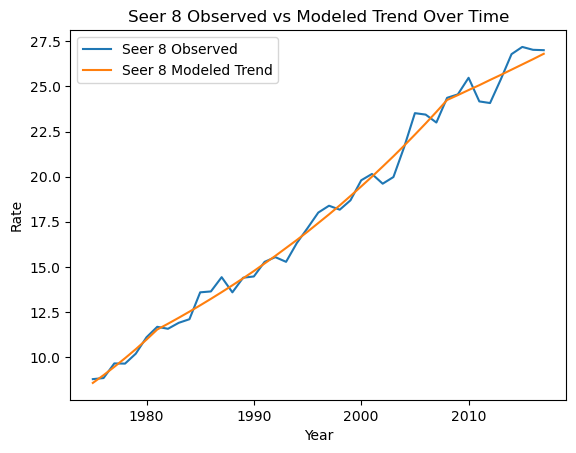

In [21]:
# Seer 8 Plot of Observed vs Modeled Acquisition Rates 
import matplotlib.pyplot as plt

filtered_df.plot(x='Year', y=['Seer 8 Observed', 'Seer 8 Modeled Trend'], kind='line')
plt.title("Seer 8 Observed vs Modeled Trend Over Time")
plt.ylabel("Rate")
plt.savefig("Seer 8 Observed vs Modeled Trend Over Time.png")
plt.show()


In [22]:
# Replac values Again 
final_df['5 Year Relative Survival SEER 8 Observed'] = final_df['5 Year Relative Survival SEER 8 Observed'].replace('-','0')

In [23]:
# Columns with percentage values to clean and convert
percentage_columns = [
    '5 Year Relative Survival SEER 8 Observed',
    '5 Year Relative Survival SEER 8 Modeled'
]

# Remove the '%' sign and convert to numeric
for col in percentage_columns:
    final_df[col] = final_df[col].str.replace('%', '', regex=False).astype(float)

In [24]:
# Filtering the Data Frame to Include Necessary Values 
filtered_df_1= final_df[final_df['Year'] <= 2010]

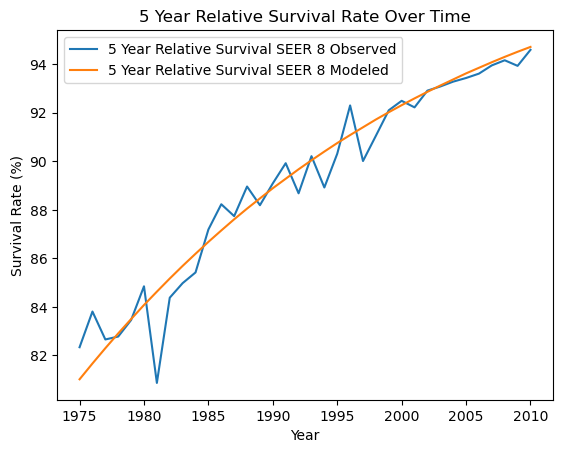

In [25]:
# Plot of Survival Rates Modeled vs Observed 
filtered_df_1.plot(x='Year', y=['5 Year Relative Survival SEER 8 Observed', 
                     '5 Year Relative Survival SEER 8 Modeled'], kind='line')
plt.title("5 Year Relative Survival Rate Over Time")
plt.ylabel("Survival Rate (%)")
plt.savefig("5 Year Relative Survival Rate Over Time.png")
plt.show()


In [26]:
# Calculate Percentage Change in Growth and Survival Rates Across Each Year 
final_df['Seer 8 Growth Rate'] = final_df['Seer 8 Observed'].pct_change() * 100
final_df['Survival Growth Rate'] = final_df['5 Year Relative Survival SEER 8 Observed'].pct_change() * 100

# Display growth rates
final_df[['Year', 'Seer 8 Growth Rate', 'Survival Growth Rate']].head()

,Year,Seer 8 Growth Rate,Survival Growth Rate
0,1975,NaN,NaN
1,1976,0.683371,1.785281
2,1977,9.162896,-1.372151
3,1978,-0.103627,0.145173
4,1979,5.705394,0.821454


In [27]:
#Display Final Data Frame 
final_df.head()

,Year,Seer 8 Observed,Seer 8 Modeled Trend,Seer 12 Observed,Seer 12 Modeled Trend,Death Rate US Observed,Death Rate US Modeled Trend,5 Year Relative Survival SEER 8 Observed,5 Year Relative Survival SEER 8 Modeled,Seer 8 Growth Rate,Survival Growth Rate
0,1975,8.78,8.57,0.0,0.0,2.07,2.18,82.34,81.02,NaN,NaN
1,1976,8.84,9.00,0.0,0.0,2.24,2.22,83.81,81.67,0.683371,1.785281
2,1977,9.65,9.46,0.0,0.0,2.27,2.25,82.66,82.30,9.162896,-1.372151
3,1978,9.64,9.94,0.0,0.0,2.31,2.29,82.78,82.91,-0.103627,0.145173
4,1979,10.19,10.44,0.0,0.0,2.42,2.33,83.46,83.50,5.705394,0.821454


In [28]:
# Filtering the Data Frame to Include Necessary Values 
final_df_filtered = final_df[final_df["Year"]<2017]

In [29]:
average_five_year_survival_rate = round(final_df_filtered['5 Year Relative Survival SEER 8 Observed'].mean(), 2)
print(f"{average_five_year_survival_rate}%")

90.05%


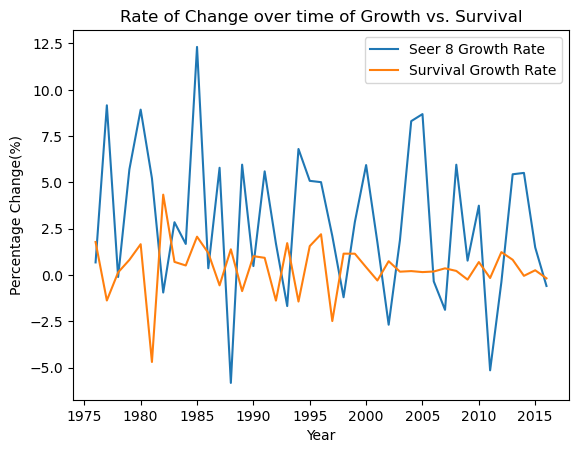

In [30]:
# Plot of Calculated Growth vs Survival Rate Across the Years 
final_df_filtered.plot(x='Year', y=['Seer 8 Growth Rate', 
                     'Survival Growth Rate'], kind='line')
plt.title("Rate of Change over time of Growth vs. Survival")
plt.ylabel("Percentage Change(%)")
plt.savefig("Rate of Change over time of Growth vs. Survival.png")
plt.show()